IMPORTING LIBRARIES AND FILES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df = pd.read_csv('C:\\Users\\♠️ Ace Of Insights💡\\Videos\\COURSES\\SCIENCE & ANALYTICS\\DATA SCIENCE\\Projects (V & F)\\Files\\Jidson Final Project\\telecom_customer_churn.csv')
df['Married'] = df['Married'].replace({'Yes': 'Married', 'No': 'Single/Unmarried'})



df.to_csv('C:\\Users\\♠️ Ace Of Insights💡\\Videos\\COURSES\\SCIENCE & ANALYTICS\\DATA SCIENCE\\Projects (V & F)\\Files\\Jidson Final Project\\new_telecom_customer_churn.csv')


OVERVIEW ANALYSIS


In [3]:
df1 = pd.read_csv('C:\\Users\\♠️ Ace Of Insights💡\\Videos\\COURSES\\SCIENCE & ANALYTICS\\DATA SCIENCE\\Projects (V & F)\\Files\\Jidson Final Project\\new_telecom_customer_churn.csv')


df1

,Unnamed: 0,Customer ID,Gender,Age,Age Group,Married,Number of Dependents,City,Zip Code,Latitude,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Customer Category,Churn Reason
0,0,0002-ORFBO,Female,37,Middle Aged,Married,0,Frazier Park,93225,34.827662,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,Satisfied,No reason to churn
1,1,0003-MKNFE,Male,46,Middle Aged,Single/Unmarried,0,Glendale,91206,34.162515,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,Satisfied,No reason to churn
2,2,0004-TLHLJ,Male,50,Old,Single/Unmarried,0,Costa Mesa,92627,33.645672,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Dissatisfied,Competitive Offers and Services
3,3,0011-IGKFF,Male,78,Very Old,Married,0,Martinez,94553,38.014457,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfied,Service Quality & Reliability
4,4,0013-EXCHZ,Female,75,Very Old,Married,0,Camarillo,93010,34.227846,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfied,Service Quality & Reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,9987-LUTYD,Female,20,Young Adults,Single/Unmarried,0,La Mesa,91941,32.759327,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,Satisfied,No reason to churn
7039,7039,9992-RRAMN,Male,40,Middle Aged,Married,0,Riverbank,95367,37.734971,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfied,Service Quality & Reliability
7040,7040,9992-UJOEL,Male,22,Young Adults,Single/Unmarried,0,Elk,95432,39.108252,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,Satisfied,No reason to churn
7041,7041,9993-LHIEB,Male,21,Young Adults,Married,0,Solana Beach,92075,33.001813,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,Satisfied,No reason to churn


In [5]:
# Calculate the total number of customers
total_customers = len(df1)

# Calculate the total number of male and female customers
gender_counts = df['Gender'].value_counts()

#Calculate the percentage for each gender
percentage_male = round((gender_counts['Male']/total_customers)*100,2)
percentage_female = round((gender_counts['Female']/total_customers)*100,2)

print(f"percentage of male customers: {percentage_male}%")
print(f"percentage of female customers: {percentage_female}%")
print(f"percentage of male customers: {total_customers}")





percentage of male customers: 50.48%
percentage of female customers: 49.52%
percentage of male customers: 7043


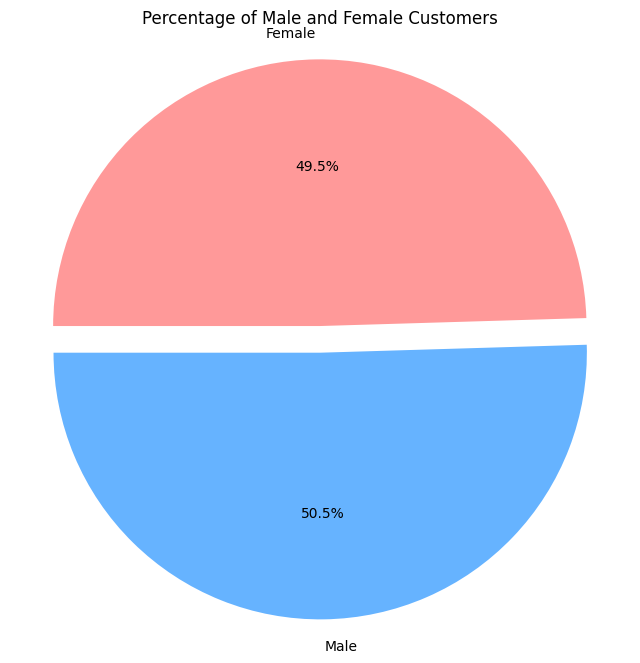

In [4]:
# Data for the pie chart
labels = ['Male', 'Female']
sizes = [gender_counts['Male'], gender_counts['Female']]  
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0) 

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
plt.title('Percentage of Male and Female Customers')
plt.axis('equal') 
plt.show()



percentage of married customers: 48.3%
percentage of single or unmarried customers: 51.7%


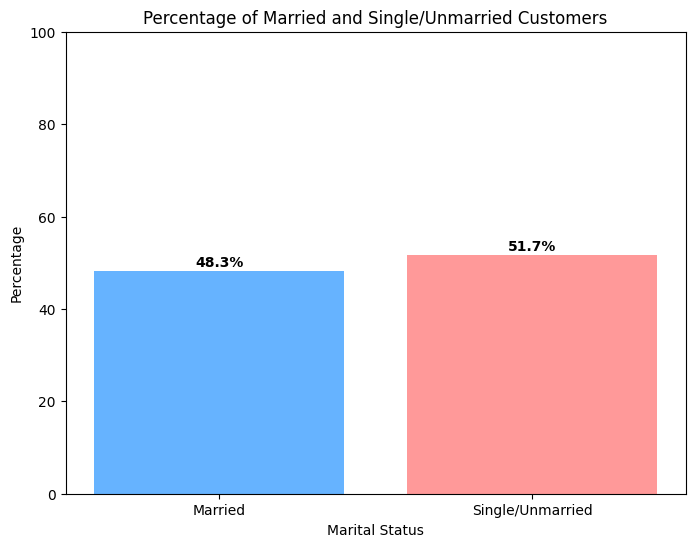

In [5]:
# Calculate the total number of married and single customers
married_counts = df1['Married'].value_counts()

#Calculate the percentage for married customers
percentage_married = round((married_counts['Married']/total_customers)*100,2)
percentage_not_married = round((married_counts['Single/Unmarried']/total_customers)*100,2)

print(f"percentage of married customers: {percentage_married}%")
print(f"percentage of single or unmarried customers: {percentage_not_married}%")

# Data for the bar chart
labels = ['Married', 'Single/Unmarried']
percentages = [percentage_married, percentage_not_married] 
colors = ['#66b3ff', '#ff9999']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, percentages, color=colors)
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.title('Percentage of Married and Single/Unmarried Customers')
plt.ylim(0, 100)  # Set the y-axis limit to 100 for better visualization
for i, v in enumerate(percentages):
    plt.text(i, v + 1, f"{v}%", ha='center', fontweight='bold')
plt.show()


In [11]:
# Getting the Gender with most Referrals
gender_referrals = df1.groupby('Gender')['Number of Referrals'].count()

gender_with_most_referrals = gender_referrals.idxmax()
max_referrals = gender_referrals.max()

print(f"gender with most referrals: {gender_with_most_referrals}")
print(f"Number of referrals by {gender_with_most_referrals}: {max_referrals}")

# This will show which category of customers based on gender are more likely to introduce their friends, colleagues, family members or neighbors to the telecom service


gender with most referrals: Male
Number of referrals by Male: 3555


In [12]:
# Getting the category of customers with most Referrals based on marital status
marital_referrals = df1.groupby('Married')['Number of Referrals'].count()

marital_with_most_referrals = marital_referrals.idxmax()
max_referrals = marital_referrals.max()

print(f"Customers based on marital status with most referrals: {marital_with_most_referrals}")
print(f"Number of referrals by {marital_with_most_referrals} customers: {max_referrals}")




Customers based on marital status with most referrals: Single/Unmarried
Number of referrals by Single/Unmarried customers: 3641


<function matplotlib.pyplot.show(close=None, block=None)>

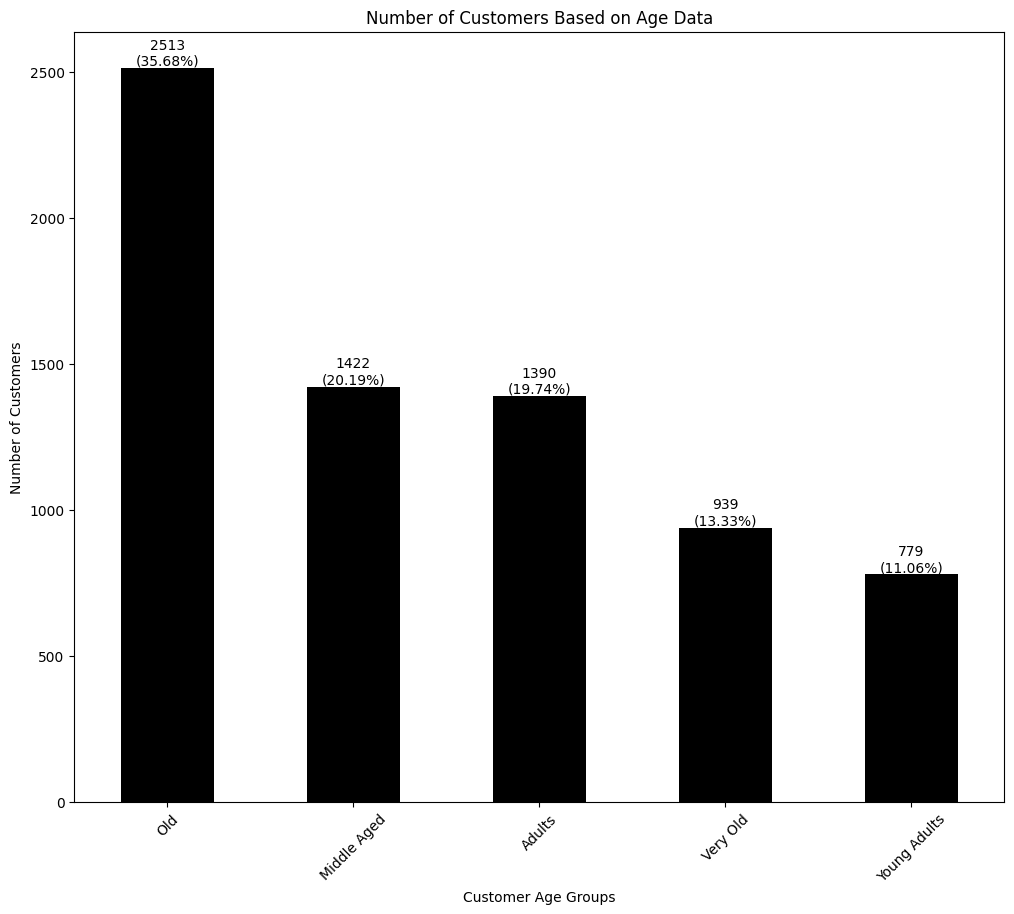

In [10]:
#Getting the Age data
age_group = df1['Age Group'].value_counts()

#Calculate the percentage of customers within certain age groups
young_adults = round((age_group['Young Adults']/total_customers)*100,1)
adults = round((age_group['Adults']/total_customers)*100,1)
middle_age = round((age_group['Middle Aged']/total_customers)*100,1)
old = round((age_group['Old']/total_customers)*100,1)
very_old = round((age_group['Very Old']/total_customers)*100,1)


plt.figure(figsize=(12,10))
ax = age_group.plot (kind='bar', color='black')
plt.xlabel('Customer Age Groups')
plt.ylabel('Number of Customers')
plt.title('Number of Customers Based on Age Data')
plt.xticks(rotation=45)

for i in ax.patches:
    count = int(i.get_height())
    percentage = round((count / total_customers) * 100, 2)
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), 
            f"{count}\n({percentage}%)", ha='center', va='bottom')
plt.show

In [45]:
# To get the various customer tenure in months

# Average 
average_tenure = df1['Tenure in Months'].mean()

# Max Tenure
max_tenure = df1['Tenure in Months'].max()

# Min Tenure
min_tenure = df1['Tenure in Months'].min()



print(f"Average tenure in months: {average_tenure:.2f} months")
print(f"Max tenure in months: {max_tenure:.2f} months")
print(f"Min tenure in months: {min_tenure: .2f} month")



Average tenure in months: 32.39 months
Max tenure in months: 72.00 months
Min tenure in months:  1.00 month


In [49]:
# Total Charge across all customers 
total_charge = df1['Total Charges'].sum()

# Average Charge across all customers
average_charge = df1['Total Charges'].mean()

# Max Total Charge
max_charge =  df1['Total Charges'].max()

# Min Total Charge
min_charge = df1['Total Charges'].min()

print(f"total charge across all customers: ${total_charge: ,.2f}")
print(f"average charge across all customers: ${average_charge: ,.2f}")
print(f"max total charge across all customers: ${max_charge: ,.2f}")
print(f"min total charge across all customers: ${min_charge: ,.2f}")

total charge across all customers: $ 16,060,725.24
average charge across all customers: $ 2,280.38
max total charge across all customers: $ 8,684.80
min total charge across all customers: $ 18.80


In [50]:
# Total Monthly Charge across all customers 
total_monthly_charge = df1['Monthly Charge'].sum()

# Average Charge across all customers
average_monthly_charge = df1['Monthly Charge'].mean()

# Max monthly Charge
max_monthly_charge =  df1['Monthly Charge'].max()

# Min monthly Charge
min_monthly_charge = df1['Monthly Charge'].min()

print(f"total monthly charge across all customers: ${total_monthly_charge: ,.2f}")
print(f"average monthly charge across all customers: ${average_monthly_charge: ,.2f}")
print(f"max monthly charge across all customers: ${max_monthly_charge: ,.2f}")
print(f"min monthly charge across all customers: ${min_monthly_charge: ,.2f}")

total monthly charge across all customers: $ 447,907.55
average monthly charge across all customers: $ 63.60
max monthly charge across all customers: $ 118.75
min monthly charge across all customers: $-10.00


In [51]:
# Total Refunds across all customers 
total_refunds = df1['Total Refunds'].sum()

# Average Charge across all customers
average_refunds = df1['Total Refunds'].mean()

# Max Total Refunds
max_refunds =  df1['Total Refunds'].max()

# Min Total Refunds
min_refunds = df1['Total Refunds'].min()

print(f"total refunds across all customers: ${total_refunds: ,.2f}")
print(f"average refunds across all customers: ${average_refunds: ,.2f}")
print(f"max refunds across all customers: ${max_refunds: ,.2f}")
print(f"min refunds across all customers: ${min_monthly_charge: ,.2f}")

total refunds across all customers: $ 13,819.65
average refunds across all customers: $ 1.96
max refunds across all customers: $ 49.79
min refunds across all customers: $-10.00


In [52]:
# Total Extra data charges across all customers 
extra_data_charges = df1['Total Extra Data Charges'].sum()

# Average Charge across all customers
average_extra_data_charges = df1['Total Extra Data Charges'].mean()

# Max Total Refunds
max_extra_data_charges =  df1['Total Extra Data Charges'].max()

# Min Total Refunds
min_extra_data_charges = df1['Total Extra Data Charges'].min()

print(f"total extra data charges across all customers: ${extra_data_charges: ,.2f}")
print(f"average extra data charges across all customers: ${average_extra_data_charges: ,.2f}")
print(f"max extra data charges across all customers: ${max_extra_data_charges: ,.2f}")
print(f"min extra data charges across all customers: ${min_extra_data_charges: ,.2f}")

total extra data charges across all customers: $ 48,320.00
average extra data charges across all customers: $ 6.86
max extra data charges across all customers: $ 150.00
min extra data charges across all customers: $ 0.00


In [7]:
# Total Long Distance charges across all customers 
long_distance_charge = df1['Total Long Distance Charges'].sum()

# Average total long distance charge across all customers
average_long_distance_charge = df1['Total Long Distance Charges'].mean()

# Max Total Refunds
max_long_distance_charge =  df1['Total Long Distance Charges'].max()

# Min Total Refunds
min_long_distance_charge = df1['Total Long Distance Charges'].min()

print(f"total long distance charges across all customers: ${long_distance_charge: ,.2f}")
print(f"average long distance charges across all customers: ${average_long_distance_charge: ,.2f}")
print(f"max long distance charges across all customers: ${max_long_distance_charge: ,.2f}")
print(f"min long distance charges across all customers: ${min_long_distance_charge: ,.2f}")

total long distance charges across all customers: $ 5,275,906.10
average long distance charges across all customers: $ 749.10
max long distance charges across all customers: $ 3,564.72
min long distance charges across all customers: $ 0.00


In [6]:
# GROSS REVENUE

gross_revenue = df1['Total Revenue'].sum()

print(f"Gross Revenue: ${gross_revenue: ,.2f}")

Gross Revenue: $ 21,371,131.69


RETAIL ANALYSIS


In [10]:
# Getting the customers with highest tenures (Top 10)
customers_with_high_tenures = df1.groupby('Customer ID')['Tenure in Months'].sum()

top_customers = customers_with_high_tenures.sort_values(ascending=False).head(10)


print(top_customers)


Customer ID
4992-LTJNE    72
5214-NLTIT    72
5304-EFJLP    72
8204-YJCLA    72
5296-PSYVW    72
8207-DMRVL    72
5286-YHCVC    72
5275-PMFUT    72
8218-FFJDS    72
8224-KDLKN    72
Name: Tenure in Months, dtype: int64


In [11]:
# Find the total number of customers with maximum tenure in months
max_tenure = df1['Tenure in Months'].max()

# Count the number of customers with the maximum tenure
customers_with_max_tenure = df1[df1['Tenure in Months'] == max_tenure]['Customer ID'].nunique()

print(f"The total number of customers with the highest tenure ({max_tenure} months): {customers_with_max_tenure}")


The total number of customers with the highest tenure (72 months): 362


<function matplotlib.pyplot.show(close=None, block=None)>

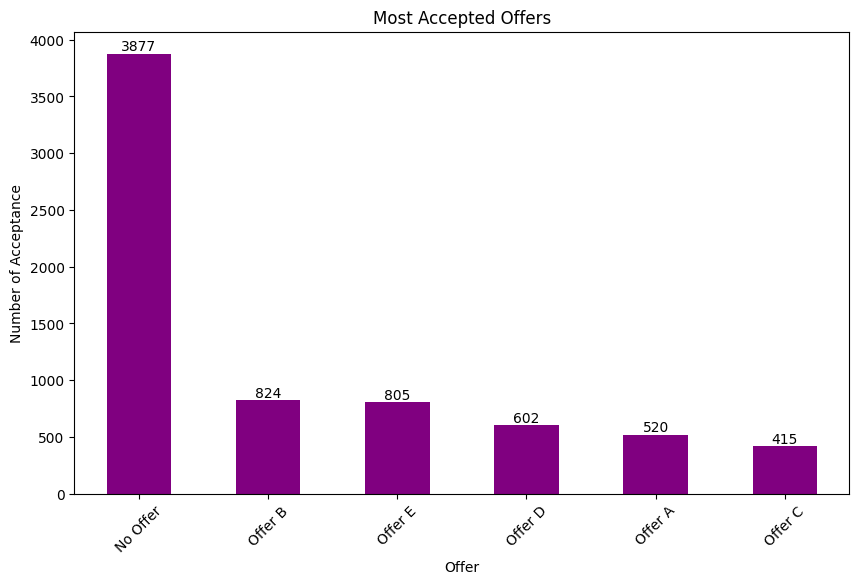

In [54]:
#Getting the most accepted offers
offer_counts = df1['Offer'].value_counts()

plt.figure(figsize=(10,6))
ax = offer_counts.plot (kind='bar', color='purple')
plt.xlabel('Offer')
plt.ylabel('Number of Acceptance')
plt.title('Most Accepted Offers')
plt.xticks(rotation=45)


for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), 
            int(i.get_height()), ha='center', va='bottom')
    
plt.show


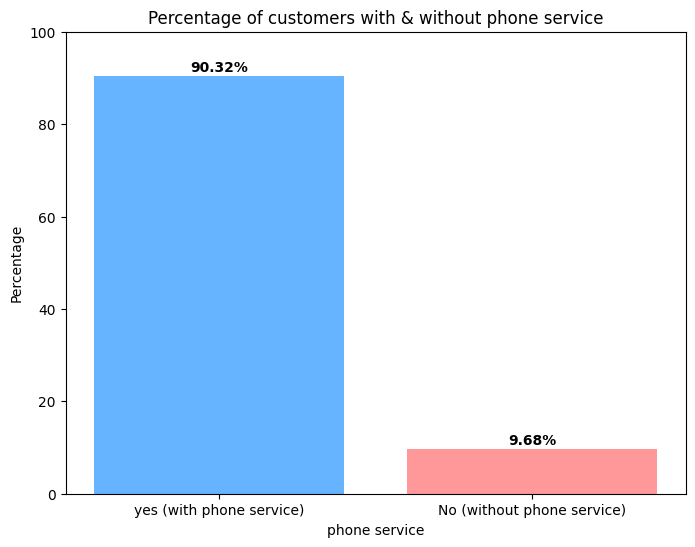

In [57]:
# Calculate the total number of customers with phone service
total_customers = len(df1)
phone_service_counts = df1['Phone Service'].value_counts()

#Calculate the percentage for customers with & without phone service
percentage_with_phone_service = round((phone_service_counts['Yes']/total_customers)*100,2)
percentage_with_no_phone_service = round((phone_service_counts['No']/total_customers)*100,2)

# Data for the bar chart
labels = ['yes (with phone service)', 'No (without phone service)']
percentages = [percentage_with_phone_service, percentage_with_no_phone_service] 
colors = ['#66b3ff', '#ff9999']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, percentages, color=colors)
plt.xlabel('phone service')
plt.ylabel('Percentage')
plt.title('Percentage of customers with & without phone service')
plt.ylim(0, 100)  # Set the y-axis limit to 100 for better visualization
for i, v in enumerate(percentages):
    plt.text(i, v + 1, f"{v}%", ha='center', fontweight='bold')
plt.show()

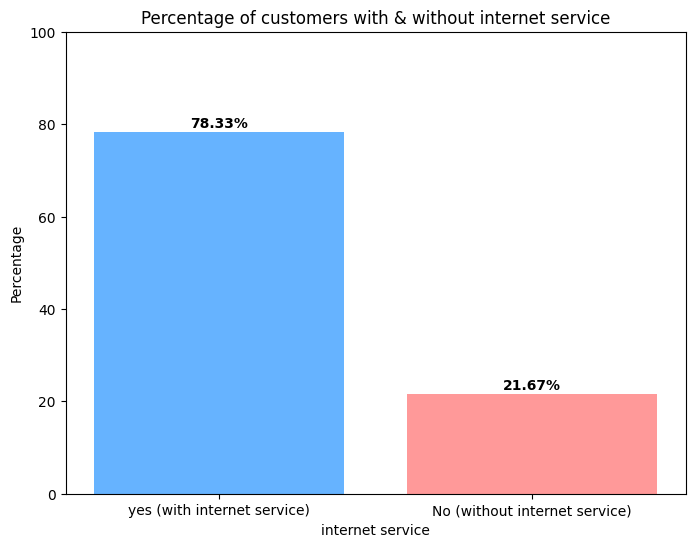

In [58]:
# Calculate the total number of customers with internet service
total_customers = len(df1)
internet_service_counts = df1['Internet Service'].value_counts()

#Calculate the percentage for customers with & without internet service
percentage_with_internet_service = round((internet_service_counts['Yes']/total_customers)*100,2)
percentage_with_no_internet_service = round((internet_service_counts['No']/total_customers)*100,2)

# Data for the bar chart
labels = ['yes (with internet service)', 'No (without internet service)']
percentages = [percentage_with_internet_service, percentage_with_no_internet_service] 
colors = ['#66b3ff', '#ff9999']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, percentages, color=colors)
plt.xlabel('internet service')
plt.ylabel('Percentage')
plt.title('Percentage of customers with & without internet service')
plt.ylim(0, 100)  # Set the y-axis limit to 100 for better visualization
for i, v in enumerate(percentages):
    plt.text(i, v + 1, f"{v}%", ha='center', fontweight='bold')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

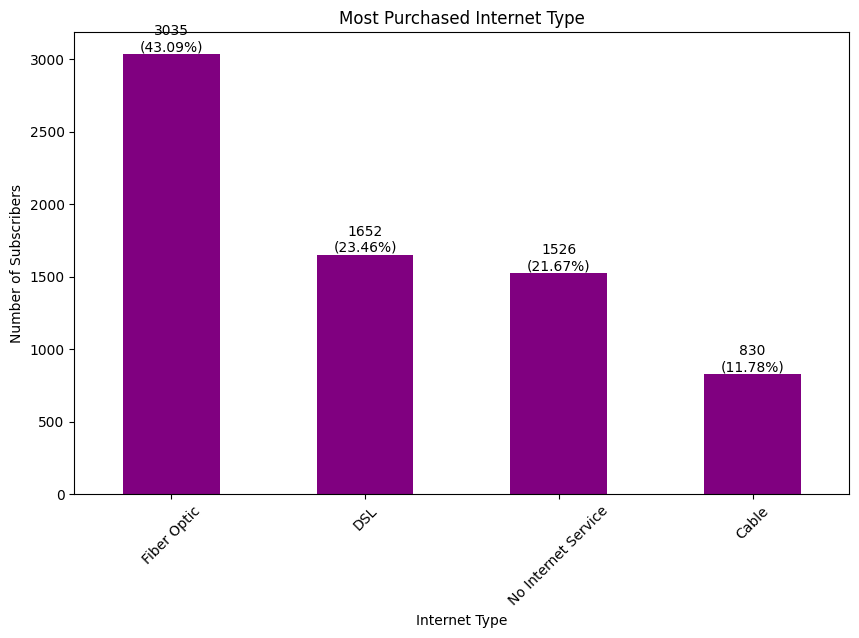

In [82]:
#Getting the most purchased internet type
internet_type = df1['Internet Type'].value_counts()

#Calculate the percentage for customers with & without internet service
percentage_with_fibre_optic = round((internet_type['Fiber Optic']/total_customers)*100,1)
percentage_with_no_internet_service = round((internet_type['No Internet Service']/total_customers)*100,1)
percentage_with_dsl = round((internet_type['DSL']/total_customers)*100,1)
percentage_with_cable = round((internet_type['Cable']/total_customers)*100,1)

plt.figure(figsize=(10,6))
ax = internet_type.plot (kind='bar', color='purple')
plt.xlabel('Internet Type')
plt.ylabel('Number of Subscribers')
plt.title('Most Purchased Internet Type')
plt.xticks(rotation=45)

for i in ax.patches:
    count = int(i.get_height())
    percentage = round((count / total_customers) * 100, 2)
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), 
            f"{count}\n({percentage}%)", ha='center', va='bottom')
plt.show


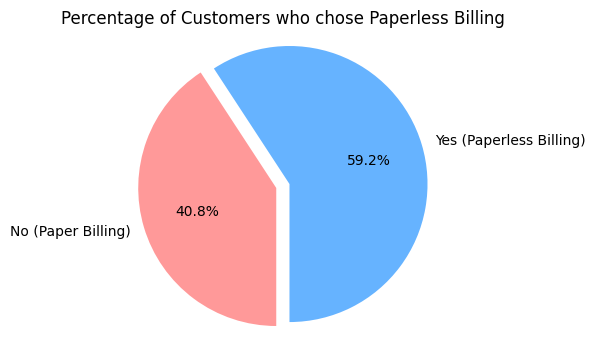

In [87]:
# Calculate the total number of customers
total_customers = len(df1)

# Calculate the total number of customers who chose paper and paperless billing
billing_counts = df['Paperless Billing'].value_counts()

#Calculate the percentage for each gender
percentage_paperless = round((billing_counts['Yes']/total_customers)*100,2)
percentage_paper = round((billing_counts['No']/total_customers)*100,2)

# Data for the pie chart
labels = ['Yes (Paperless Billing)', 'No (Paper Billing)']
sizes = [billing_counts['Yes'], billing_counts['No']]  
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0) 

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=270)
plt.title('Percentage of Customers who chose Paperless Billing')
plt.axis('equal') 
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

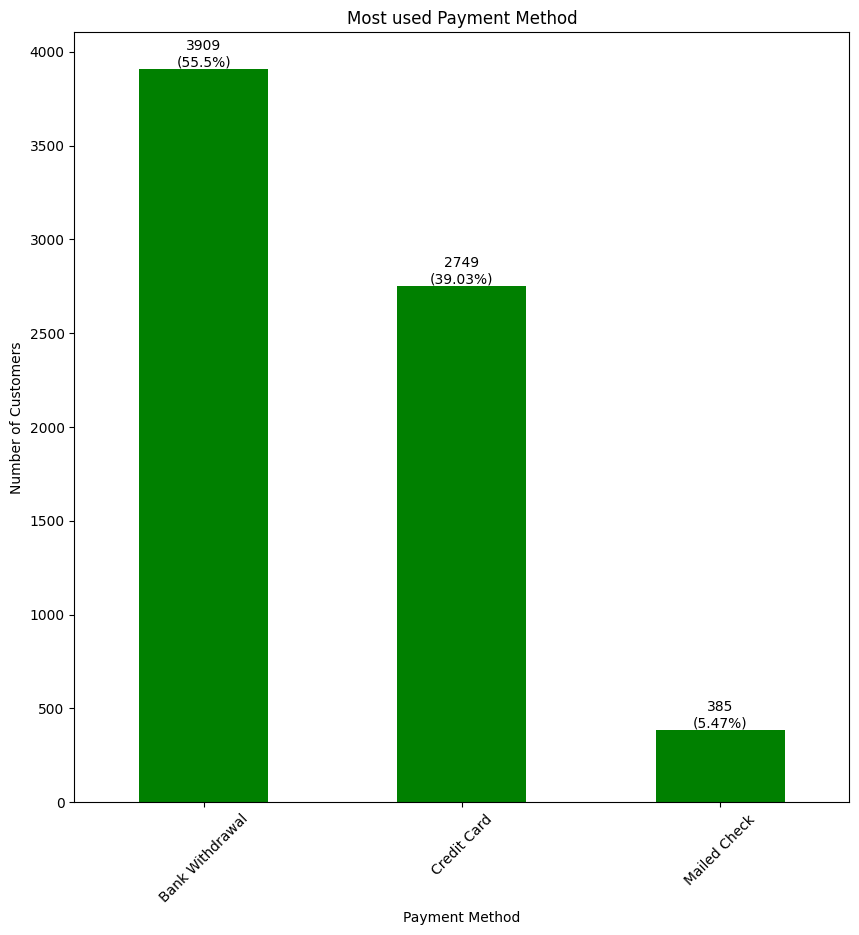

In [180]:
#Getting the most used payment method
payment_method_count = df1['Payment Method'].value_counts()

#Calculate the percentage for most used payment method
percentage_with_credit_card = round((payment_method_count['Credit Card']/total_customers)*100,1)
percentage_with_bank_withdrawal = round((payment_method_count['Bank Withdrawal']/total_customers)*100,1)
percentage_with_mailed_check = round((payment_method_count['Mailed Check']/total_customers)*100,1)

plt.figure(figsize=(10,10))
ax = payment_method_count.plot (kind='bar', color='green')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.title('Most used Payment Method')
plt.xticks(rotation=45)

for i in ax.patches:
    count = int(i.get_height())
    percentage = round((count / total_customers) * 100, 2)
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), 
            f"{count}\n({percentage}%)", ha='center', va='bottom')
plt.show


In [100]:
# Getting the customers with highest monthly charge (Top 20)
customers_with_high_monthly_charge = df1.groupby('Customer ID')['Monthly Charge'].sum()

top_customers = customers_with_high_monthly_charge.sort_values(ascending=False).head(20)

print (top_customers) 

Customer ID
7569-NMZYQ    118.75
8984-HPEMB    118.65
5734-EJKXG    118.60
5989-AXPUC    118.60
8199-ZLLSA    118.35
9924-JPRMC    118.20
2889-FPWRM    117.80
3810-DVDQQ    117.60
9739-JLPQJ    117.50
2302-ANTDP    117.45
6904-JLBGY    117.35
4282-MSACW    117.20
6650-BWFRT    117.15
9788-HNGUT    116.95
1488-PBLJN    116.85
0017-IUDMW    116.80
8628-MFKAX    116.75
3258-ZKPAI    116.60
3680-CTHUH    116.60
3795-CAWEX    116.55
Name: Monthly Charge, dtype: float64


In [95]:
# Getting the customers with highest total refunds (Top 20)
customers_with_high_total_refunds = df1.groupby('Customer ID')['Total Refunds'].sum()

top_customers = customers_with_high_total_refunds.sort_values(ascending=False).head(20)

print(top_customers)

Customer ID
1270-XKUCC    49.79
0480-KYJVA    49.76
9606-PBKBQ    49.57
3523-QRQLL    49.57
7426-WEIJX    49.53
7501-IWUNG    49.51
2916-BQZLN    49.38
2077-DDHJK    49.37
1353-LJWEM    49.24
7781-EWARA    49.23
7233-IOQNP    49.22
2454-RPBRZ    49.06
0550-DCXLH    49.02
3727-RJMEO    48.95
5338-YHWYT    48.79
9402-ORRAH    48.66
9033-EOXWV    48.61
3058-WQDRE    48.59
1555-DJEQW    48.54
9524-EGPJC    48.26
Name: Total Refunds, dtype: float64


In [108]:
# Getting the customers with highest extra data charge (Top 20)
customers_with_high_extra_data_charge = df1.groupby('Customer ID')['Total Extra Data Charges'].sum()

top_customers = customers_with_high_extra_data_charge.sort_values(ascending=False).head(20)

print(top_customers)

Customer ID
9833-TGFHX    150
2001-EWBQU    150
7811-JIVPF    150
2167-FQSTQ    150
1685-VAYJF    150
4785-QRJHC    150
9469-WEJBT    150
9137-UIYPG    150
7636-PEPNS    150
7018-WBJNK    150
3407-JMJQQ    150
4560-WQAQW    150
9885-AIBVB    150
7241-AJHFS    150
8707-HOEDG    150
2348-KCJLT    150
4011-ARPHK    150
3920-HIHMQ    150
9506-UXUSK    150
7402-PWYJJ    150
Name: Total Extra Data Charges, dtype: int64


In [105]:
# Find the total number of customers with maximum tenure in months
max_extra_data_charge = df1['Total Extra Data Charges'].max()

# Count the number of customers with the maximum tenure
customers_with_max_extra_data_charge = df1[df1['Total Extra Data Charges'] == max_extra_data_charge]['Customer ID'].nunique()

print(f"The total number of customers with the highest extra data charges ({max_extra_data_charge} months): {customers_with_max_extra_data_charge}")

The total number of customers with the highest extra data charges (150 months): 42


In [107]:
# Getting the customers with highest total long distance charges (Top 20)
customers_with_high_long_distance_charge = df1.groupby('Customer ID')['Total Long Distance Charges'].sum()

top_customers = customers_with_high_long_distance_charge.sort_values(ascending=False).head(20)

print(top_customers)

Customer ID
1926-QUZNN    3564.72
2848-YXSMW    3564.00
4900-MSOMT    3536.64
3508-CFVZL    3515.92
2834-JRTUA    3508.82
5945-AZYHT    3501.72
3963-RYFNS    3493.44
7503-MIOGA    3492.72
3071-MVJCD    3487.68
0164-APGRB    3482.64
8374-UULRV    3481.92
5453-YBTWV    3476.90
1820-DJFPH    3476.88
8722-PRFDV    3461.96
6928-ONTRW    3458.88
8760-ZRHKE    3449.89
8755-IWJHN    3443.79
0619-OLYUR    3443.76
8263-QMNTJ    3443.04
6181-AXXYF    3433.68
Name: Total Long Distance Charges, dtype: float64


CHURN ANALYSIS

<function matplotlib.pyplot.show(close=None, block=None)>

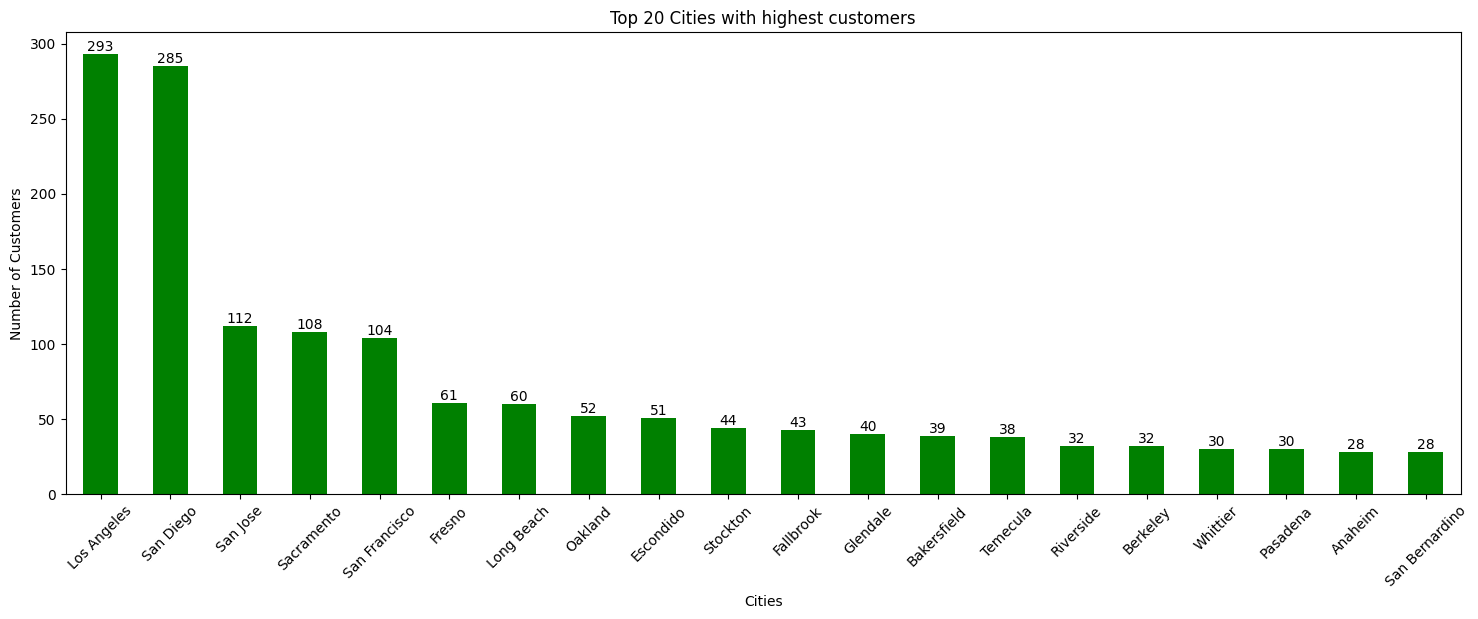

In [132]:
#Getting the cities with largest customers

city_count = df1['City'].value_counts()
city_with_most_customers = city_count.sort_values(ascending=False).head(20)

plt.figure(figsize=(18,6))
ax = city_with_most_customers.plot (kind='bar', color='green')
plt.xlabel('Cities')
plt.ylabel('Number of Customers')
plt.title('Top 20 Cities with highest customers')
plt.xticks(rotation=45)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), 
            int(i.get_height()), ha='center', va='bottom')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

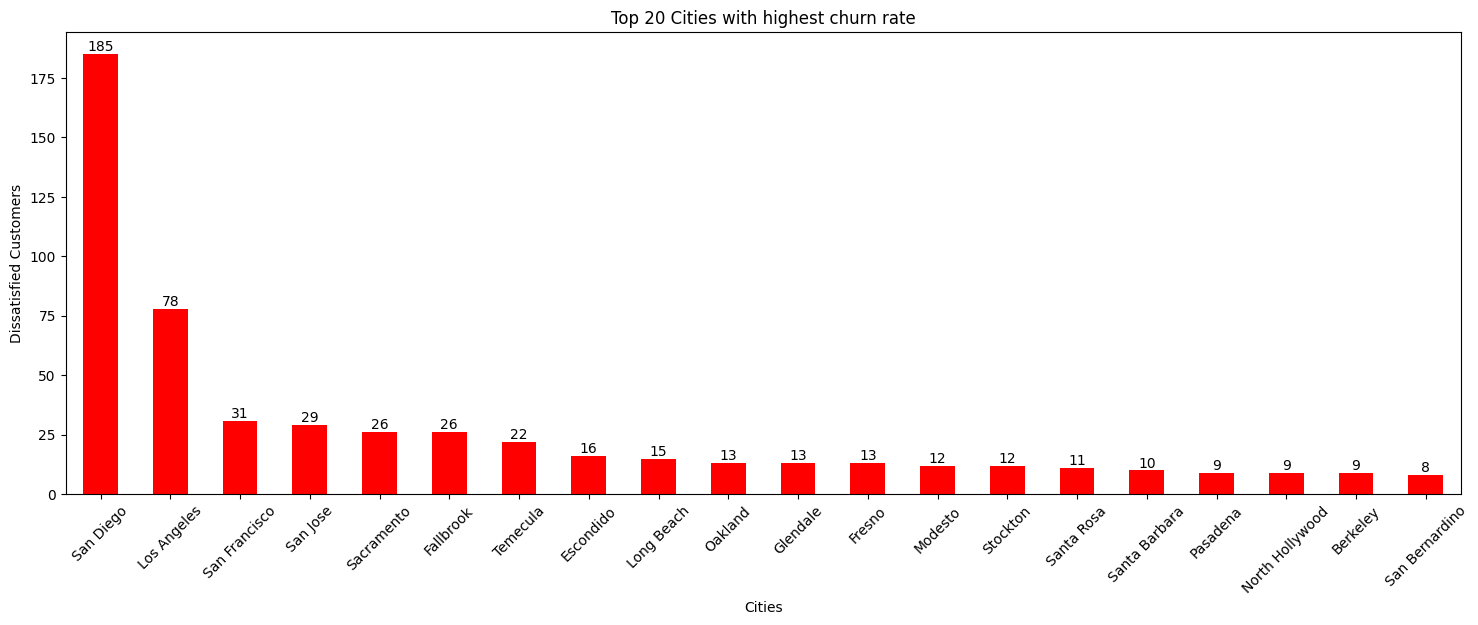

In [143]:
#Getting city with highest churned customers
churned_customers = df1[df1['Customer Category'] == 'Dissatisfied']

dissatisfied_city_count = churned_customers['City'].value_counts()

churned_customers_by_city = dissatisfied_city_count.sort_values(ascending=False).head(20)

plt.figure(figsize=(18,6))
ax = churned_customers_by_city.plot (kind='bar', color='red')
plt.xlabel('Cities')
plt.ylabel('Dissatisfied Customers')
plt.title('Top 20 Cities with highest churn rate')
plt.xticks(rotation=45)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), 
            int(i.get_height()), ha='center', va='bottom')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

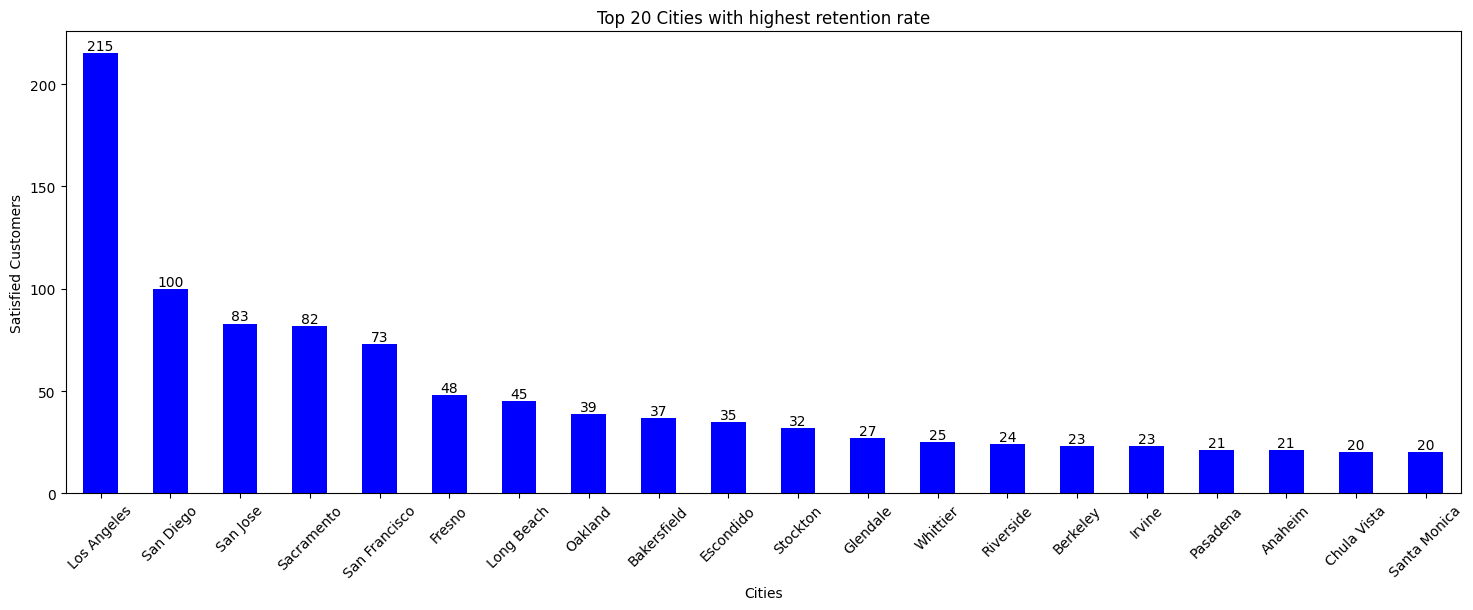

In [145]:
#Getting city with highest retained customers
retained_customers = df1[df1['Customer Category'] == 'Satisfied']

satisfied_city_count = retained_customers['City'].value_counts()

retained_customers_by_city = satisfied_city_count.sort_values(ascending=False).head(20)

plt.figure(figsize=(18,6))
ax = retained_customers_by_city.plot (kind='bar', color='blue')
plt.xlabel('Cities')
plt.ylabel('Satisfied Customers')
plt.title('Top 20 Cities with highest retention rate')
plt.xticks(rotation=45)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), 
            int(i.get_height()), ha='center', va='bottom')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

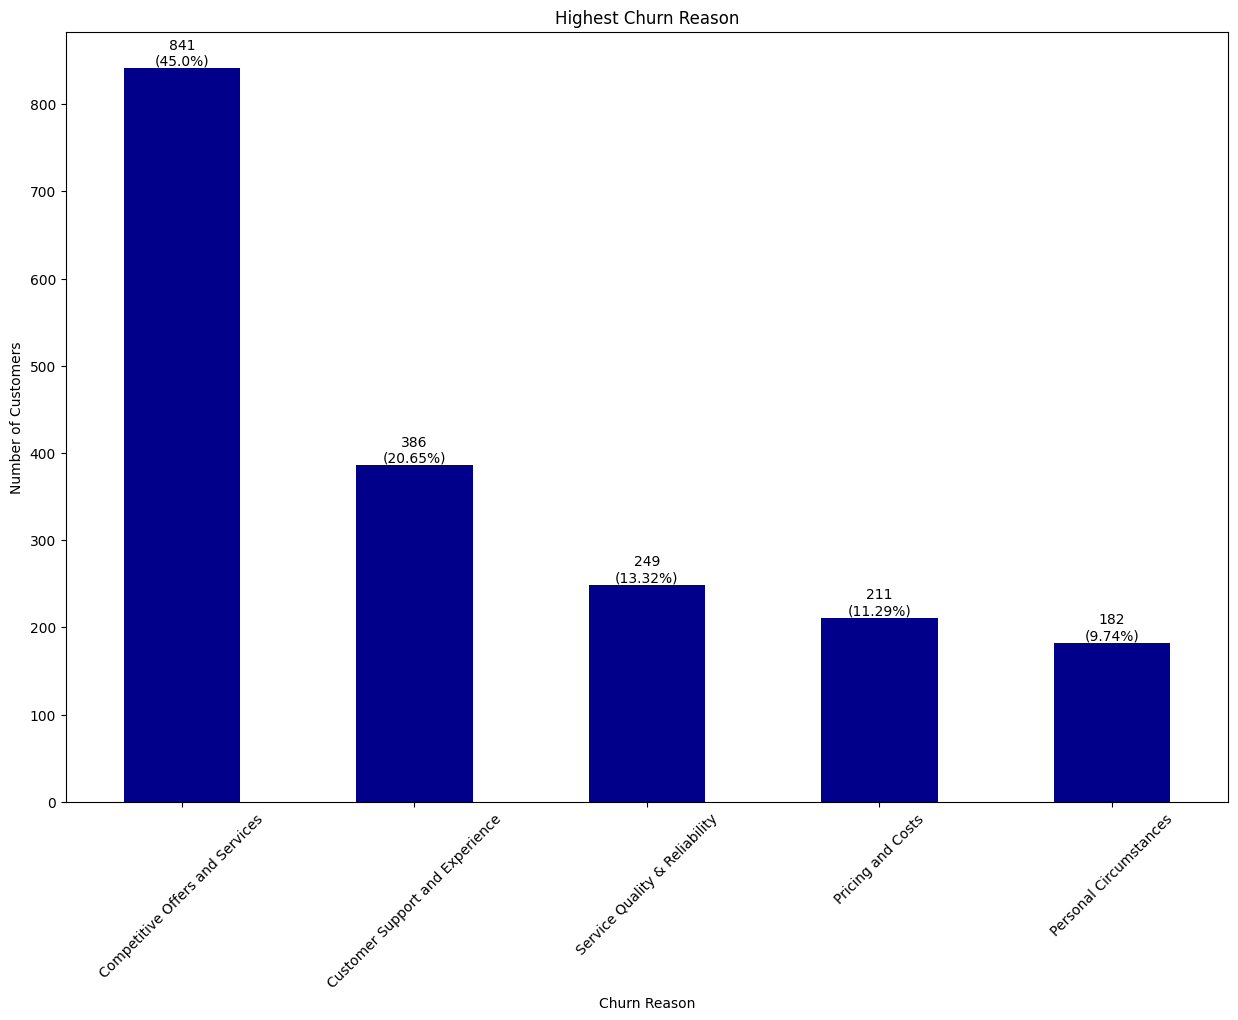

In [179]:
df1 = pd.read_csv('C:\\Users\\♠️ Ace Of Insights💡\\Videos\\COURSES\\SCIENCE & ANALYTICS\\DATA SCIENCE\\Projects (V & F)\\Files\\Jidson Final Project\\new_telecom_customer_churn.csv')

#Getting the highest churn reason
churn_reason_count = df1['Churn Reason'].value_counts()
churned_customers = df1[df1['Customer Category'] == 'Dissatisfied']
retained_customers = df1[df1['Customer Category'] == 'Satisfied']

dissatisfied_customers = (total_customers - len(retained_customers))

#Calculate the percentage for highest churn reason
percentage_A = round((churn_reason_count['Competitive Offers and Services'] / dissatisfied_customers)*100,1)
percentage_B = round((churn_reason_count['Customer Support and Experience'] / dissatisfied_customers)*100,1)
percentage_C = round((churn_reason_count['Personal Circumstances'] / dissatisfied_customers)*100,1)
percentage_D = round((churn_reason_count['Pricing and Costs'] / dissatisfied_customers)*100,1)
percentage_E = round((churn_reason_count['Service Quality & Reliability'] / dissatisfied_customers)*100,1)

plt.figure(figsize=(15,10))
ax = churn_reason_count.plot (kind='bar', color='darkblue')
plt.xlabel('Churn Reason')
plt.ylabel('Number of Customers')
plt.title('Highest Churn Reason')
plt.xticks(rotation=45)

for i in ax.patches:
    count = int(i.get_height())
    percentage = round((count / dissatisfied_customers) * 100, 2)
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), 
            f"{count}\n({percentage}%)", ha='center', va='bottom')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

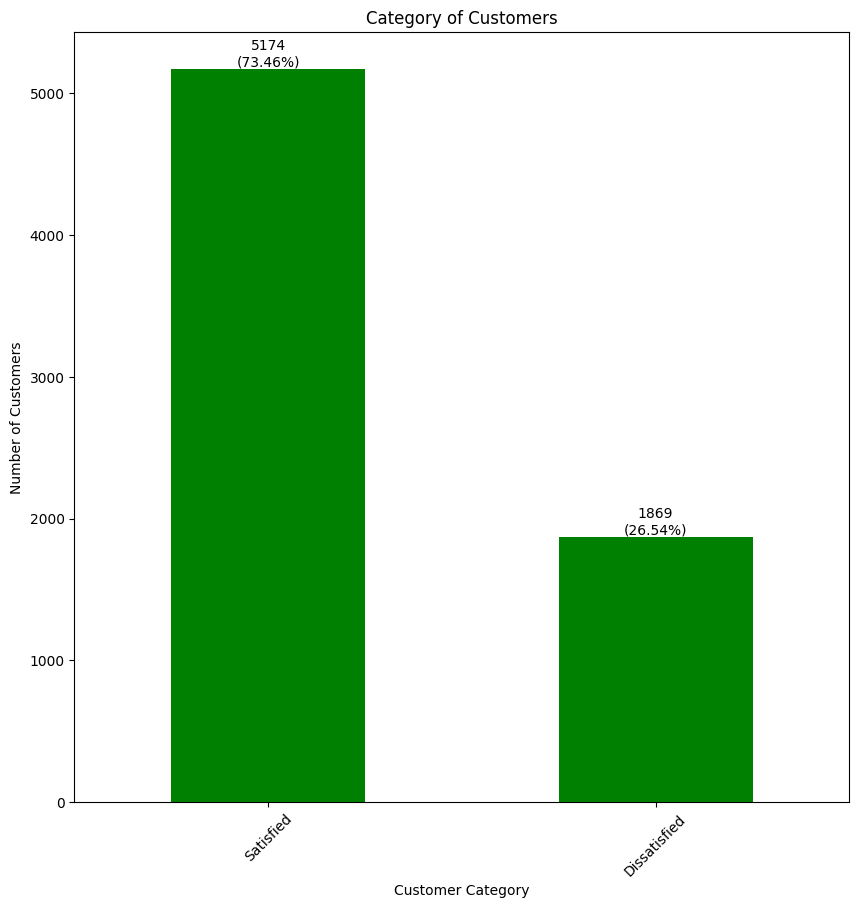

In [173]:
#Getting the data for category of customers

category_count = df1['Customer Category'].value_counts()

#Calculate the percentage for both categories
percentage_A = round((category_count['Satisfied']/total_customers)*100,1)
percentage_B = round((category_count['Dissatisfied']/total_customers)*100,1)

plt.figure(figsize=(10,10))
ax = category_count.plot (kind='bar', color='green')
plt.xlabel('Customer Category')
plt.ylabel('Number of Customers')
plt.title('Category of Customers')
plt.xticks(rotation=45)

for i in ax.patches:
    count = int(i.get_height())
    percentage = round((count / total_customers) * 100, 2)
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), 
            f"{count}\n({percentage}%)", ha='center', va='bottom')

plt.show

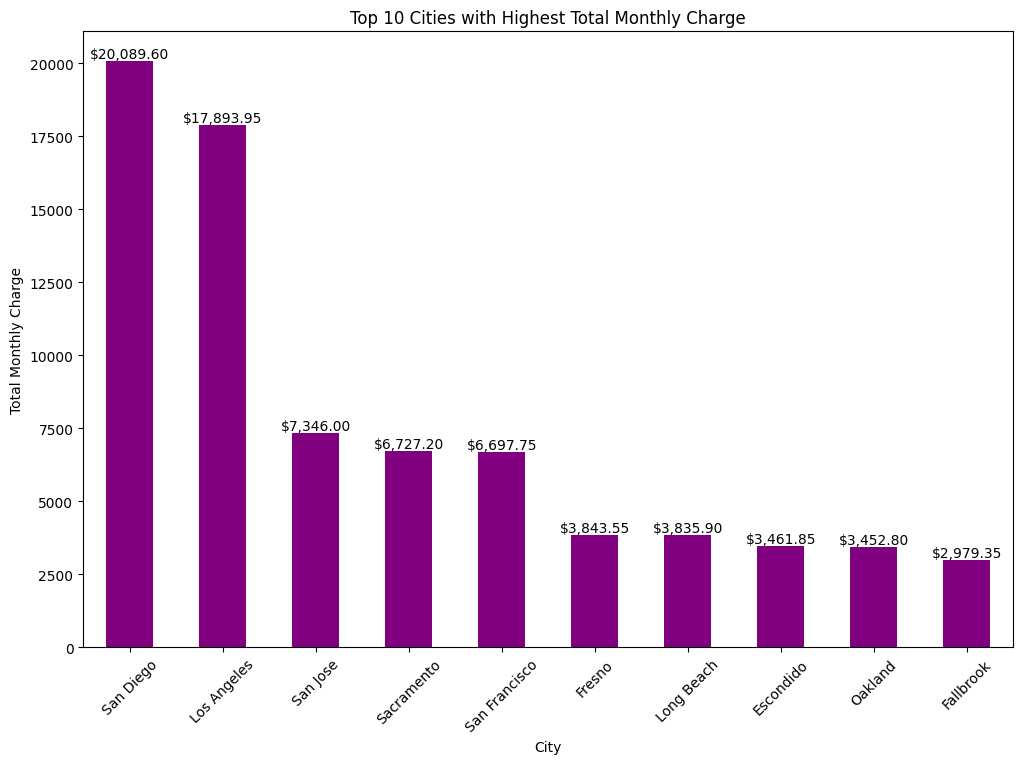

In [181]:
# Group by city and calculate the total monthly charge
total_monthly_charge_by_city = df1.groupby('City')['Monthly Charge'].sum()

top_10_cities = total_monthly_charge_by_city.sort_values(ascending=False).head(10)

# Create the bar graph
plt.figure(figsize=(12, 8))
ax = top_10_cities.plot(kind='bar', color='purple')

for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'${yval:,.2f}', ha='center', va='bottom')

plt.xlabel('City')
plt.ylabel('Total Monthly Charge')
plt.title('Top 10 Cities with Highest Total Monthly Charge')
plt.xticks(rotation=45)

plt.show()


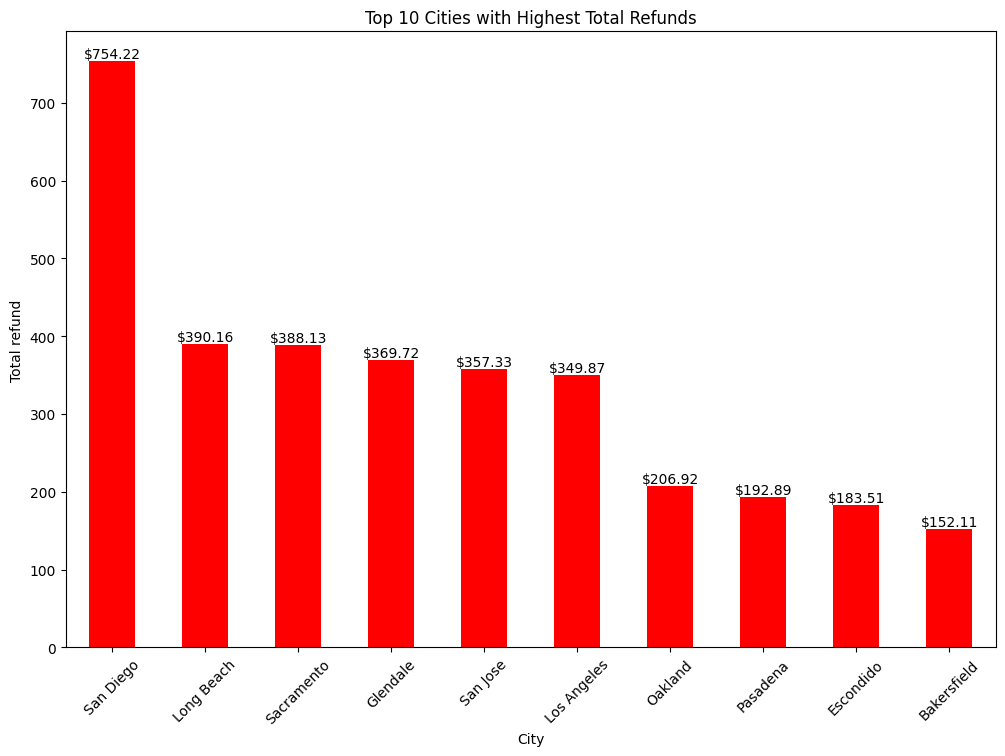

In [182]:
# Group by city and calculate the total refund
total_refund_by_city = df1.groupby('City')['Total Refunds'].sum()

top_10_cities = total_refund_by_city.sort_values(ascending=False).head(10)

# Create the bar graph
plt.figure(figsize=(12, 8))
ax = top_10_cities.plot(kind='bar', color='red')

for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'${yval:,.2f}', ha='center', va='bottom')

plt.xlabel('City')
plt.ylabel('Total refund')
plt.title('Top 10 Cities with Highest Total Refunds')
plt.xticks(rotation=45)

plt.show()


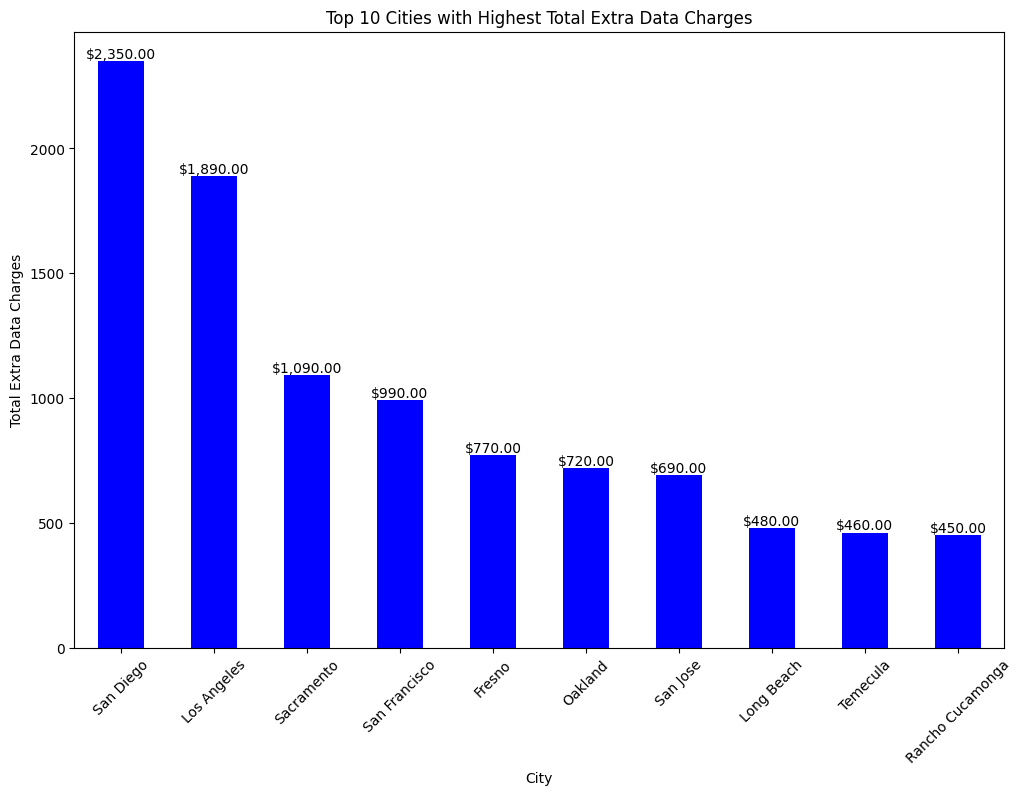

In [184]:
# Group by city and calculate the total extra data charge
total_extra_data_charges_by_city = df1.groupby('City')['Total Extra Data Charges'].sum()

top_10_cities = total_extra_data_charges_by_city.sort_values(ascending=False).head(10)

# Create the bar graph
plt.figure(figsize=(12, 8))
ax = top_10_cities.plot(kind='bar', color='blue')

for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'${yval:,.2f}', ha='center', va='bottom')

plt.xlabel('City')
plt.ylabel('Total Extra Data Charges')
plt.title('Top 10 Cities with Highest Total Extra Data Charges')
plt.xticks(rotation=45)

plt.show()


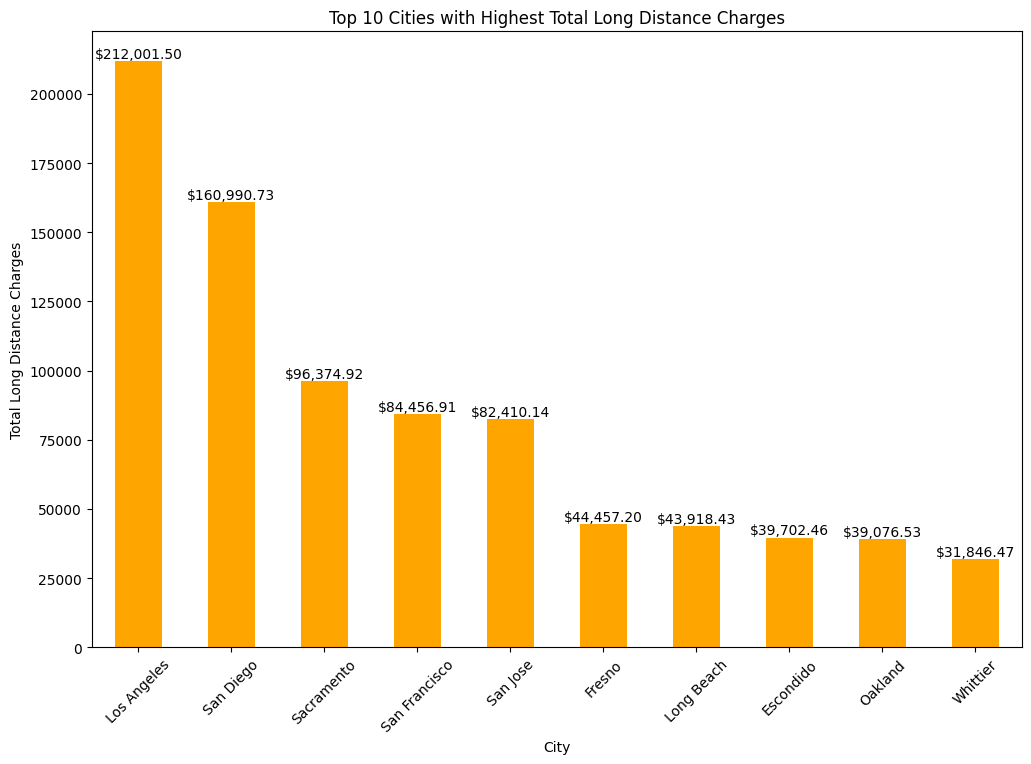

In [185]:
# Group by city and calculate the total extra long distance charge
total_extra_long_distance_charges_by_city = df1.groupby('City')['Total Long Distance Charges'].sum()

top_10_cities = total_extra_long_distance_charges_by_city.sort_values(ascending=False).head(10)

# Create the bar graph
plt.figure(figsize=(12, 8))
ax = top_10_cities.plot(kind='bar', color='orange')

for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'${yval:,.2f}', ha='center', va='bottom')

plt.xlabel('City')
plt.ylabel('Total Long Distance Charges')
plt.title('Top 10 Cities with Highest Total Long Distance Charges')
plt.xticks(rotation=45)

plt.show()


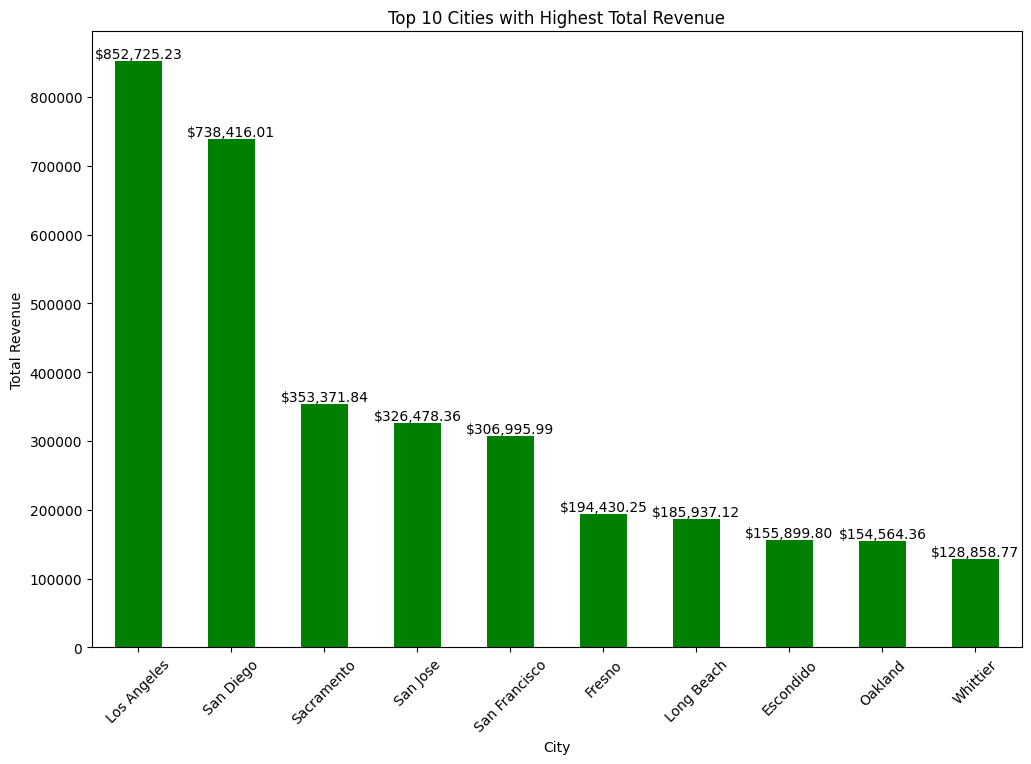

In [186]:
# Group by city and calculate the total revenue
total_revenue_by_city = df1.groupby('City')['Total Revenue'].sum()

top_10_cities = total_revenue_by_city.sort_values(ascending=False).head(10)

# Create the bar graph
plt.figure(figsize=(12, 8))
ax = top_10_cities.plot(kind='bar', color='green')

for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'${yval:,.2f}', ha='center', va='bottom')

plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.title('Top 10 Cities with Highest Total Revenue')
plt.xticks(rotation=45)

plt.show()
